In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [2]:
f=np.load('f_cry_mfcc,chroma.npy')
l=np.load('l_cry_mfcc,chroma.npy')

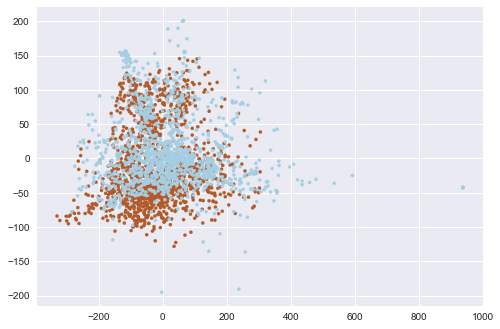

In [3]:
X=f
y=l.ravel()

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
plt.style.use("seaborn")

plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, s=10, cmap=plt.cm.Paired)

In [4]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
print(Xreduced.shape)

(2234, 2)


In [5]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X_train, X_test, y_train, y_test = train_test_split(Xreduced, y, test_size=0.05, random_state=0)
print(X_test.shape)

(112, 2)


No handles with labels found to put in legend.


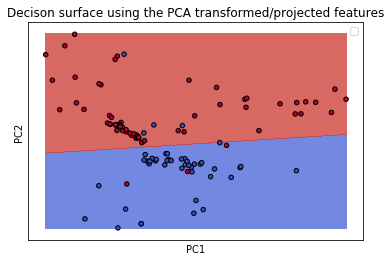

In [6]:
clf = SVC(kernel='linear',C=0.1,gamma=0.0001, degree=2)
clf.fit(X_test, y_test)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()